In [15]:
import tomosipo as ts
import numpy as np
from medpy.io import load
import matplotlib.pyplot as plt
import torch
import time

In [19]:
base_path='C:/Users/lliu10/OneDrive - Inside MD Anderson/siemenproject/data/'
mage_data, image_header = load(base_path+'17_1.mha')

In [34]:
data=np.load(base_path+'SiemensCiosSpin_Siemens.npz')

In [47]:
data.files

['ProjectionMatrices', 'RotorAngles']

In [38]:
np.shape(data['ProjectionMatrices'])

(400, 3, 4)

In [40]:
data['ProjectionMatrices'][0]

array([[ 2.09899531e-01,  1.85799725e+00, -1.10167844e-03,
         1.09165896e+00],
       [ 6.92310078e-04,  1.01704131e-03,  1.86980090e+00,
         1.86780826e+00],
       [-1.61841163e-03,  1.89925099e-04, -2.19194142e-06,
         1.00000000e+00]])

In [41]:
data['ProjectionMatrices'][1]

array([[ 1.97841415e-01,  1.86093479e+00, -1.03652402e-03,
         2.30392209e+00],
       [ 1.01068052e-03,  9.23079635e-04,  1.87140888e+00,
         1.84992059e+00],
       [-1.60750252e-03,  1.77408141e-04, -1.75880354e-06,
         1.00000000e+00]])

cone beam

In [20]:
vg = ts.volume(shape=np.shape(mage_data), size=(1, 1, 1))
pg = ts.cone(angles=9, shape=(512, 512), size=(2, 2), src_orig_dist=5, src_det_dist=10)
svg = ts.svg(vg, pg)
svg.save("intro_forward_projection_geometries_cone.svg")

Rotate the volume

In [46]:
angles = np.linspace(0, np.pi, 10, endpoint=False)
R = ts.rotate(pos=0, axis=(1, 0, 0), angles=angles)
R1 = ts.rotate(pos=0, axis=(0, 1, 0), angles=angles)
R2 = ts.rotate(pos=0, axis=(0, 0, 1), angles=angles)
T = ts.translate((0, 0, 1))
vg_rot=R*R1*R2*T*vg.to_vec()
pg = ts.cone(angles=1, shape=(512, 512), size=(2, 2), src_orig_dist=5, src_det_dist=10)
svg = ts.svg(vg_rot, pg)
svg.save("intro_forward_projection_geometries_rot.svg")
A = ts.operator(vg_rot, pg)

In [21]:
A = ts.operator(vg, pg)

In [27]:
start_time = time.time()
y=A(mage_data)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.9868483543395996 seconds ---


GPU demo

In [24]:
mage_data_gpu=torch.from_numpy(mage_data)
start_time = time.time()
y=A(mage_data_gpu)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.9633145332336426 seconds ---


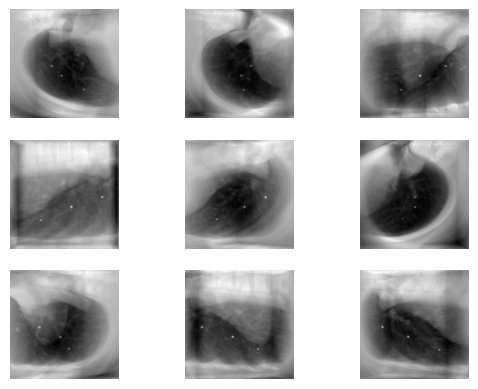

In [28]:
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(y[:, i, :],cmap='gray') # first projection
    plt.axis('off')
    #plt.imshow(y[:, 8, :],cmap='gray') # quarter rotation

In [10]:
fluro, fh = load(base_path+'43_1')

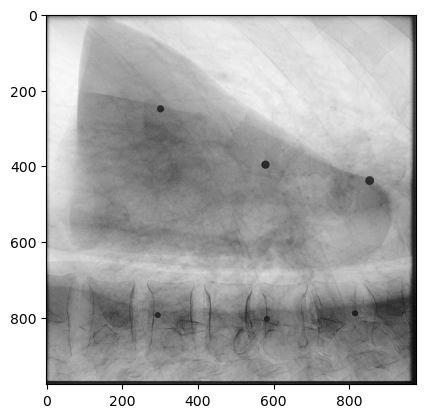

In [12]:
plt.imshow(fluro[:,:,0],cmap='gray')